In [19]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("E:\DL course\DataSets\Iris Dataset - iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
df.shape

(150, 6)

In [23]:
df=df.drop('Id',axis=1)

In [24]:
#Splitting data
df_sample=df[df['Species'] != 'Iris-setosa']
x=df_sample.drop('Species',axis=1)
y=df_sample['Species'].map({ 'Iris-versicolor':0, 'Iris-virginica':1}).values

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,shuffle=True,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((80, 4), (80,), (20, 4), (20,))

In [26]:
# Standardizing the data
mean=np.mean(x_train,axis=0)
std=np.std(x_train,axis=0)

x_train=(x_train-mean)/std
x_test=(x_test-mean)/std

x_train.shape,x_test.shape

((80, 4), (20, 4))

In [38]:
class Perceptron:
    
    def __init__(self, learning_rate=0.0001, epochs=100):
        self.w = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def output_layer(self, x):
        return np.dot(x, self.w)
    
    def step(self, x):
        return np.where(x >= 0, 1, 0)
        
    def mse(self, y_true, y_pred):
        return ((y_pred - y_true) ** 2).mean()    
        
    def fit(self, x_train, y_train):
        x_train = np.c_[np.ones(x_train.shape[0]), x_train]
        self.w = np.zeros(x_train.shape[1])  # Reshape not needed
        
        for epoch in range(self.epochs):
            preds = self.output_layer(x_train)
            y_pred = np.vectorize(self.step)(preds)
            
            error = self.mse(y_train, y_pred)
            dE_dW = -2 * np.dot((y_train - y_pred), x_train) / len(y_train)
            
            self.w -= self.learning_rate * dE_dW
            
            print(f'Iteration: {epoch}, Error: {error}')
    
    def predict(self, x_test):
        x_test = np.c_[np.ones(x_test.shape[0]), x_test]
        predictions = self.output_layer(x_test)
        y_test = np.vectorize(self.step)(predictions)
        return y_test


In [39]:
# Object creation
perceptron=Perceptron(learning_rate=0.001,epochs=100)
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)

Iteration: 0, Error: 0.475
Iteration: 1, Error: 0.1625
Iteration: 2, Error: 0.125
Iteration: 3, Error: 0.0625
Iteration: 4, Error: 0.05
Iteration: 5, Error: 0.025
Iteration: 6, Error: 0.0125
Iteration: 7, Error: 0.0125
Iteration: 8, Error: 0.0125
Iteration: 9, Error: 0.0125
Iteration: 10, Error: 0.0
Iteration: 11, Error: 0.0
Iteration: 12, Error: 0.0
Iteration: 13, Error: 0.0
Iteration: 14, Error: 0.0
Iteration: 15, Error: 0.0
Iteration: 16, Error: 0.0
Iteration: 17, Error: 0.0
Iteration: 18, Error: 0.0
Iteration: 19, Error: 0.0
Iteration: 20, Error: 0.0
Iteration: 21, Error: 0.0
Iteration: 22, Error: 0.0
Iteration: 23, Error: 0.0
Iteration: 24, Error: 0.0
Iteration: 25, Error: 0.0
Iteration: 26, Error: 0.0
Iteration: 27, Error: 0.0
Iteration: 28, Error: 0.0
Iteration: 29, Error: 0.0
Iteration: 30, Error: 0.0
Iteration: 31, Error: 0.0
Iteration: 32, Error: 0.0
Iteration: 33, Error: 0.0
Iteration: 34, Error: 0.0
Iteration: 35, Error: 0.0
Iteration: 36, Error: 0.0
Iteration: 37, Error: 0

In [29]:
correct_predictions = np.sum(y_pred == y_test)
total_samples = len(y_test)

accuracy = correct_predictions / total_samples
print(f"Accuracy: {accuracy * 100:.2f}%")
print(x_test.shape)

Accuracy: 90.00%
(20, 4)


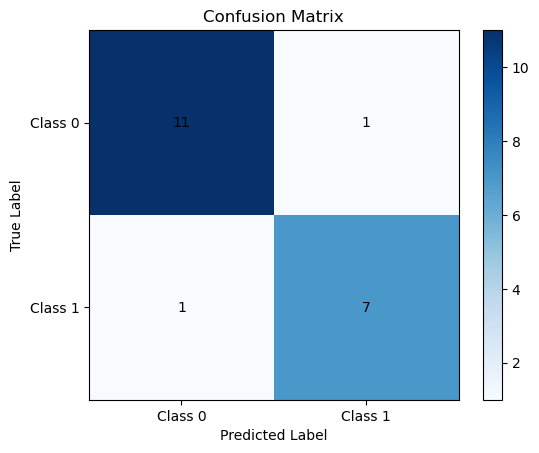

In [30]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

class_labels = [f'Class {i}' for i in range(conf_matrix.shape[0])]
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

plt.show()
